In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Task in Sci-kit learn

### TV_sales

In [2]:
tv_sales_raw_data = pd.read_csv('tvmarketing.csv')
tv_sales_raw_data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
tv_sales_raw_data.describe()


,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [4]:
print('corr =',tv_sales_raw_data['Sales'].corr(tv_sales_raw_data['TV']))
tv_sales_raw_data

corr = 0.7822244248616061


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


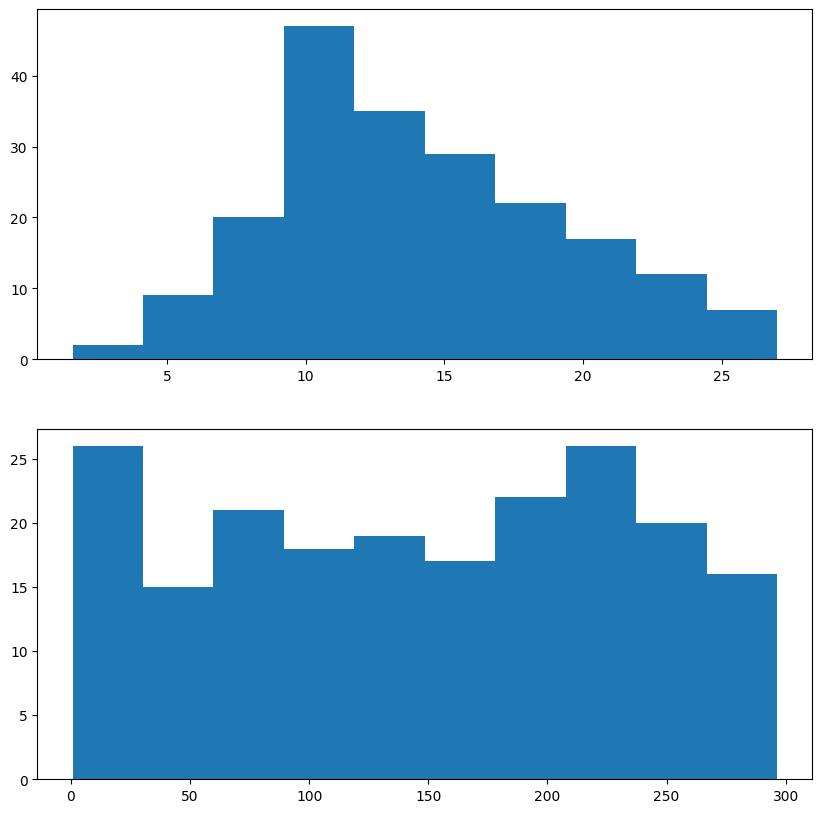

In [5]:
fig, ax = plt.subplots(2)
ax[0].hist(tv_sales_raw_data['Sales'])
ax[1].hist(tv_sales_raw_data['TV'])

fig.set_size_inches(w=10,h=10)

<Axes: >

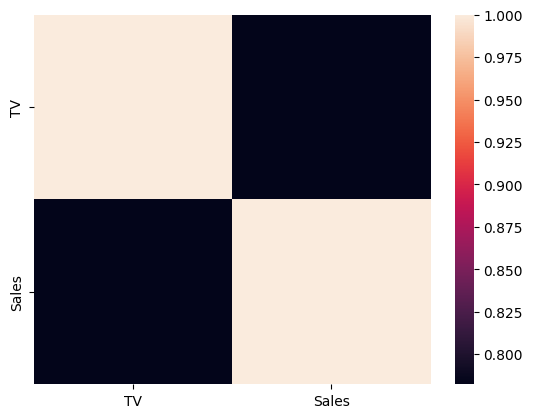

In [6]:
sns.heatmap(tv_sales_raw_data.corr())

In [7]:
tv_sales_raw_data['TV_logged'] = np.log(tv_sales_raw_data['TV'])
tv_sales_raw_data['Sales_logged'] = np.log(tv_sales_raw_data['Sales'])

<Axes: xlabel='TV', ylabel='Sales'>

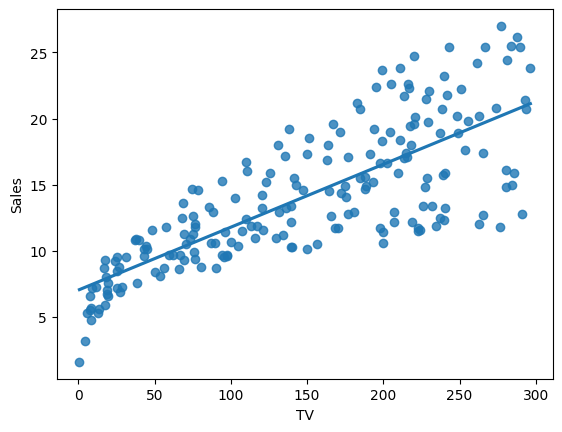

In [8]:
sns.regplot(x='TV',
                y='Sales',
                data=tv_sales_raw_data,
                ci=None
                )


<Axes: xlabel='TV_logged', ylabel='Sales_logged'>

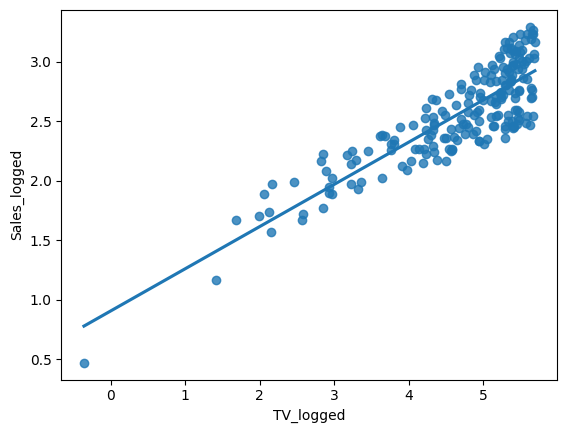

In [9]:
sns.regplot(x='TV_logged',
                y='Sales_logged',
                data=tv_sales_raw_data,
                ci=None
                )

In [10]:
X = tv_sales_raw_data[['TV_logged']]
y = tv_sales_raw_data[['Sales_logged']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 1)
Shape of X_test: (40, 1)
Shape of y_train: (160, 1)
Shape of y_test: (40, 1)


In [11]:
mdl_sales_vs_tv = LinearRegression()
mdl_sales_vs_tv.fit(X_train, y_train)
y_calculated = mdl_sales_vs_tv.predict(X_test)
print(mdl_sales_vs_tv.coef_)
print(mdl_sales_vs_tv.intercept_)
print(r2_score(y_test, y_calculated))

[[0.34170599]]
[0.96923617]
0.8264626126656345


<Axes: >

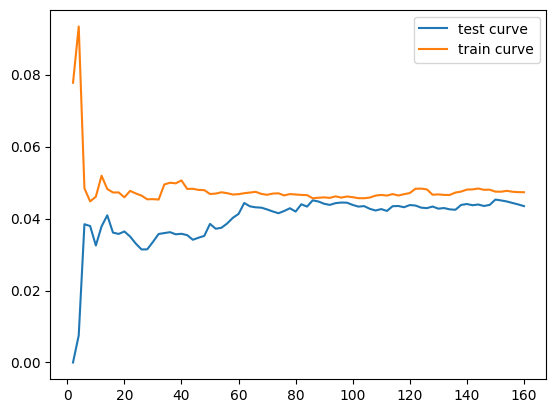

In [12]:
sizes = np.linspace(start=2, stop=len(y_train), num=80)

errors_test_tv = []
errors_train_tv = []

for size in sizes:
    mdl_learning_sales = LinearRegression()
    mdl_learning_sales.fit(X_train[:int(size)], y_train[:int(size)])
    
    y_calculated_full_test = mdl_learning_sales.predict(X_test)
    y_calculated_some_tst = mdl_learning_sales.predict(X_train[:int(size)])

    errors_test_tv.append(mean_squared_error(y_calculated_some_tst, y_train[:int(size)]))
    errors_train_tv.append(mean_squared_error(y_calculated_full_test, y_test))


sns.lineplot(x=sizes, y=np.array(errors_test_tv), label='test curve')
sns.lineplot(x=sizes, y=np.array(errors_train_tv), label='train curve')

### Auto_mpg data set

In [13]:
df_mpg = pd.read_csv('auto-mpg.csv')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [14]:
df_mpg.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [15]:
mpg_data_set = df_mpg.copy()
mpg_data_set['horsepower'] = mpg_data_set['horsepower'].replace('?', np.nan)
mpg_data_set['horsepower'] = mpg_data_set['horsepower'].astype('float64')

In [16]:
mpg_data_set.info()
mpg_data_set.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


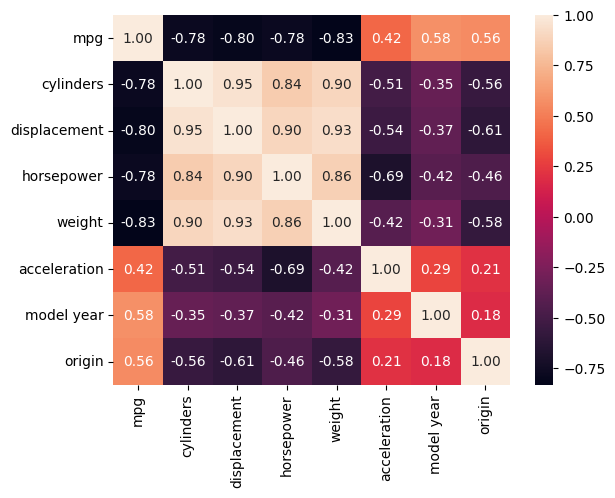

In [17]:
categorical_data = ['car name']
numerical_data = list(mpg_data_set.columns)
numerical_data.remove('car name')


#scatter_matrix(mpg_data_set[numerical_data], figsize=(20,20))
sns.heatmap(mpg_data_set[numerical_data].corr(), annot=True, fmt='.2f')
plt.show()

In [18]:
mdl_code_car_name = LabelEncoder()
numerical_data.append('car_factory')
mpg_data_set['car_factory'] = mpg_data_set['car name'].str.split().str[0]
mpg_data_set['car_factory'] = mdl_code_car_name.fit_transform(mpg_data_set[['car_factory']])

/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='model year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>,
        <Axes: xlabel='car_factory', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='model year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>,
        <Axes: xlabel='car_factory', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacemen

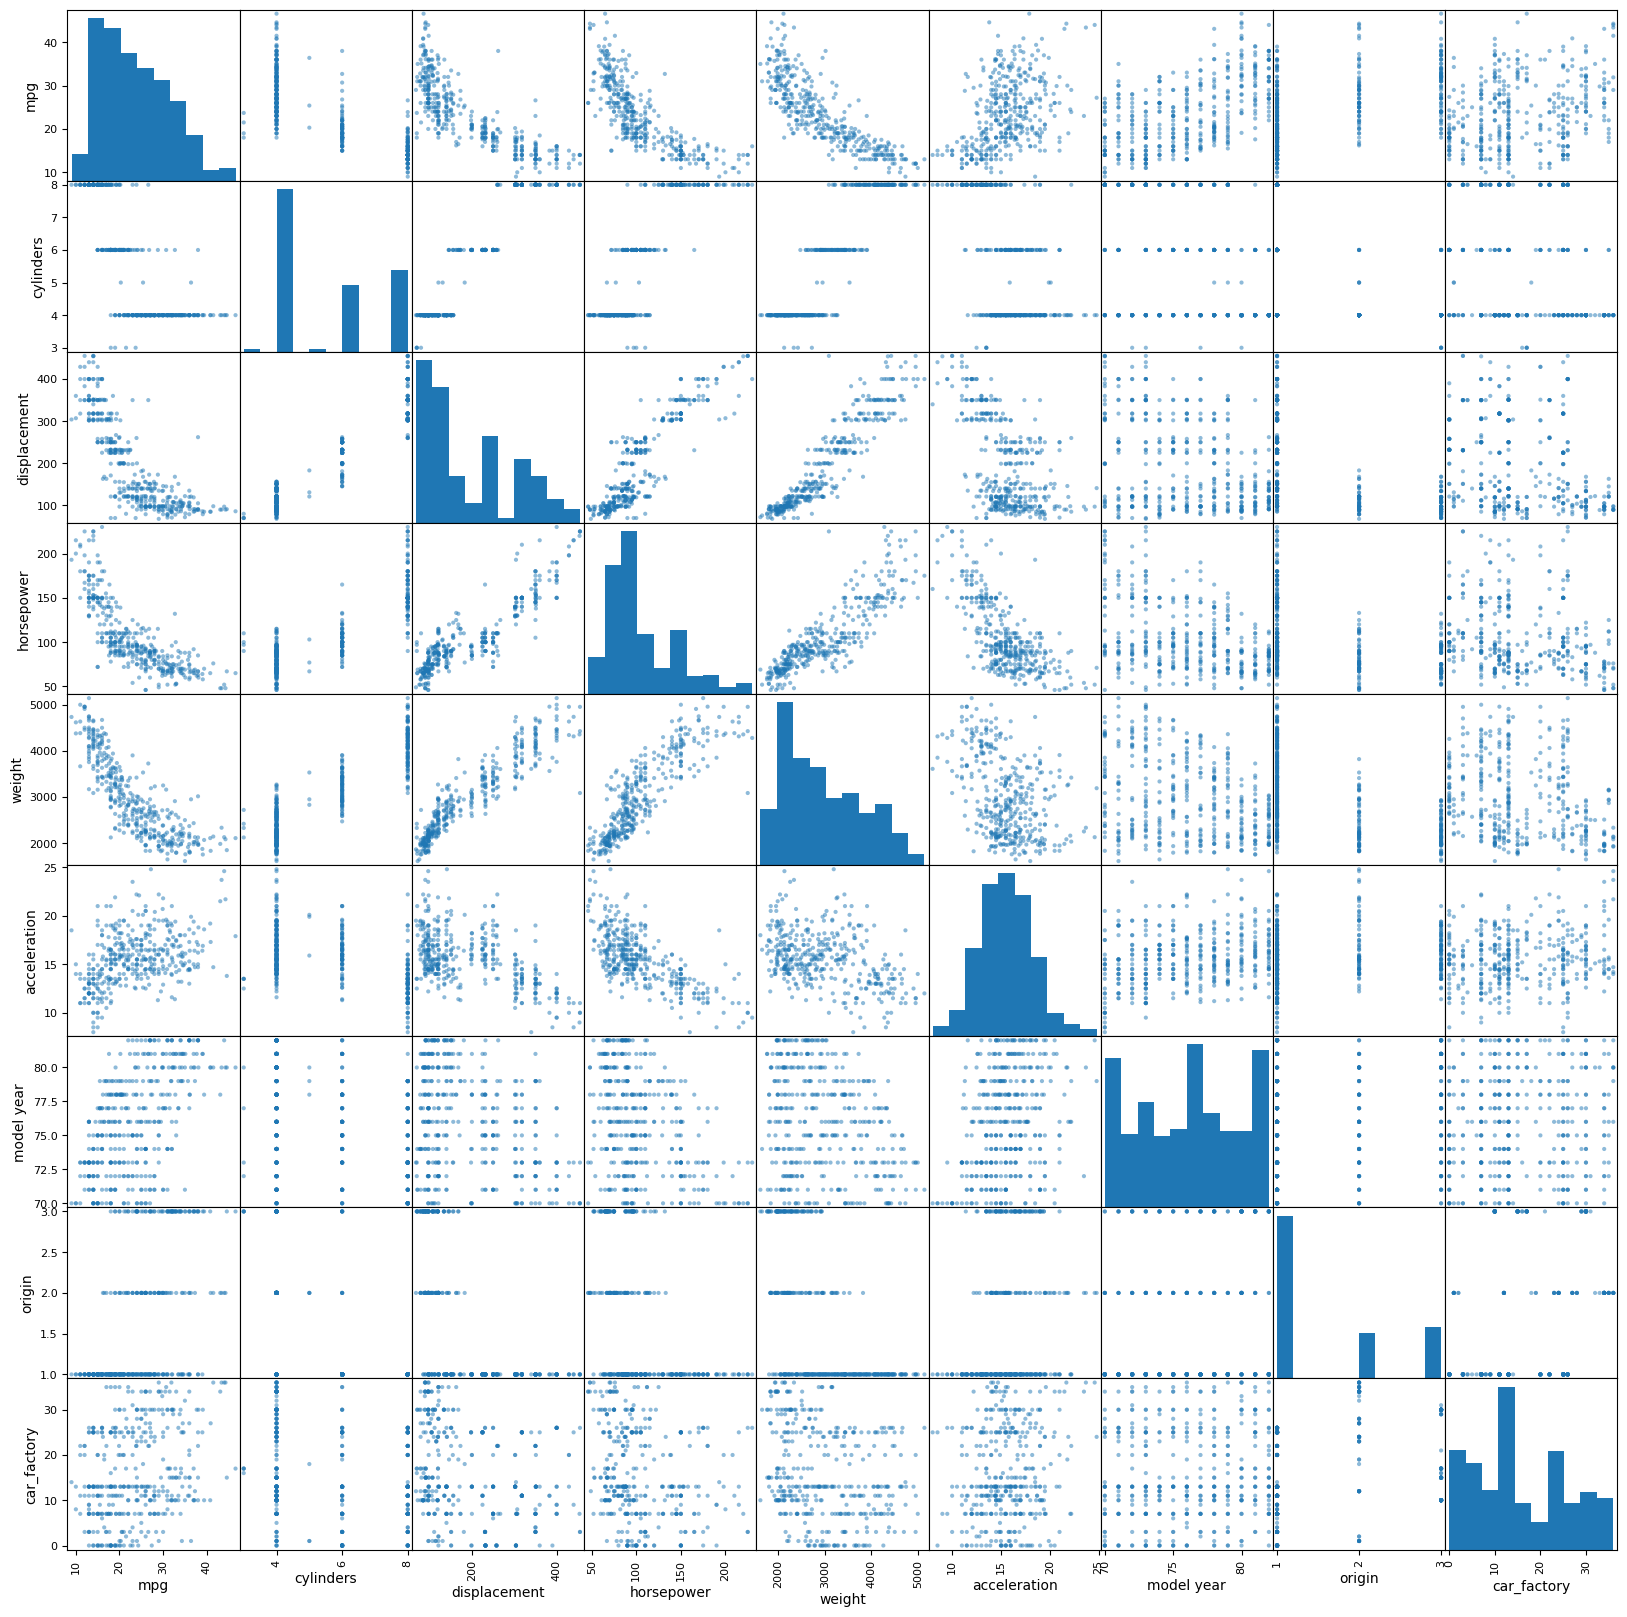

In [19]:
scatter_matrix(mpg_data_set[numerical_data], figsize=(20,20))

              mpg   cylinders  displacement    horsepower      weight  \
count  398.000000  398.000000    398.000000  3.920000e+02  398.000000   
mean    23.514573    5.454774      0.324098 -1.812609e-16    0.384867   
std      7.815984    1.701004      0.269431  1.001278e+00    0.240103   
min      9.000000    3.000000      0.000000 -1.520975e+00    0.000000   
25%     17.500000    4.000000      0.093669 -7.665929e-01    0.173164   
50%     23.000000    4.000000      0.208010 -2.853488e-01    0.337539   
75%     29.000000    8.000000      0.501292  5.600800e-01    0.565637   
max     46.600000    8.000000      1.000000  3.265452e+00    1.000000   

       acceleration  model year      origin  car_factory  
count    398.000000  398.000000  398.000000   398.000000  
mean      15.568090   76.010050    1.572864    15.841709  
std        2.757689    3.697627    0.802055    10.159066  
min        8.000000   70.000000    1.000000     0.000000  
25%       13.825000   73.000000    1.000000    

0      0.664133
1      1.574594
2      1.184397
3      1.184397
4      0.924265
         ...   
393   -0.480448
394   -1.364896
395   -0.532474
396   -0.662540
397   -0.584501
Name: horsepower, Length: 398, dtype: float64

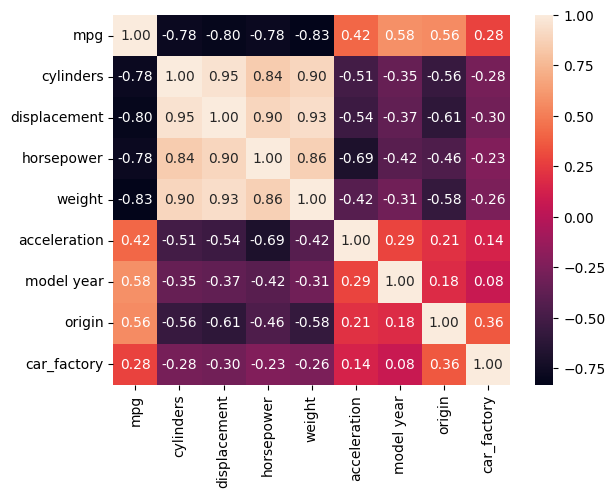

In [20]:
mdl_scale = StandardScaler()
mpg_data_set[['horsepower']] = mdl_scale.fit_transform(mpg_data_set[['horsepower']])
mdl_displacement_weight = MinMaxScaler()
mpg_data_set[['displacement', 'weight']] = mdl_displacement_weight.fit_transform(mpg_data_set[['displacement', 'weight']])
sns.heatmap(mpg_data_set[numerical_data].corr(), annot=True, fmt='.2f')
print(mpg_data_set.describe())
mpg_data_set['horsepower'].fillna(0)

In [21]:
mpg_data_set = mpg_data_set.dropna()
X = mpg_data_set[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = mpg_data_set[['mpg']]



mdl_multi_mpg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
mdl_multi_mpg.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
r2_score(y_test, mdl_multi_mpg.predict(X_test))

0.8395562651158598

In [23]:
sizes = np.linspace(start=2, stop=len(mpg_data_set), num=196)


<Axes: >

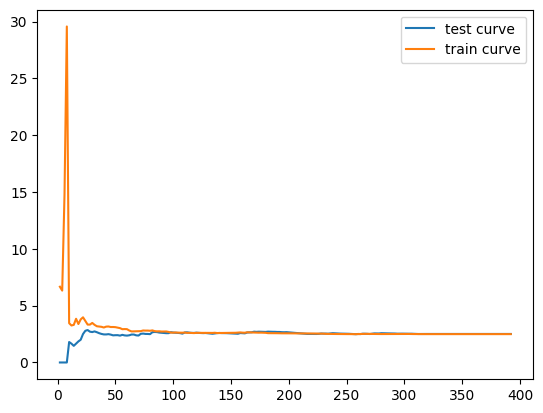

In [24]:
errors_test_tv = []
errors_train_tv = []

for size in sizes:
    mdl_learning_sales = LinearRegression()
    mdl_learning_sales.fit(X_train[:int(size)], y_train[:int(size)])
    
    y_calculated_full_test = mdl_learning_sales.predict(X_test)
    y_calculated_some_tst = mdl_learning_sales.predict(X_train[:int(size)])

    errors_test_tv.append(mean_absolute_error(y_calculated_some_tst, y_train[:int(size)]))
    errors_train_tv.append(mean_absolute_error(y_calculated_full_test, y_test))


sns.lineplot(x=sizes, y=np.array(errors_test_tv), label='test curve')
sns.lineplot(x=sizes, y=np.array(errors_train_tv), label='train curve')

### Boston Data Set

In [25]:
df_boston = pd.read_csv('Boston-house-price-data.csv') 
print(df_boston.info())
print(df_boston.describe())
print(df_boston.isna().sum())
print(df_boston.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

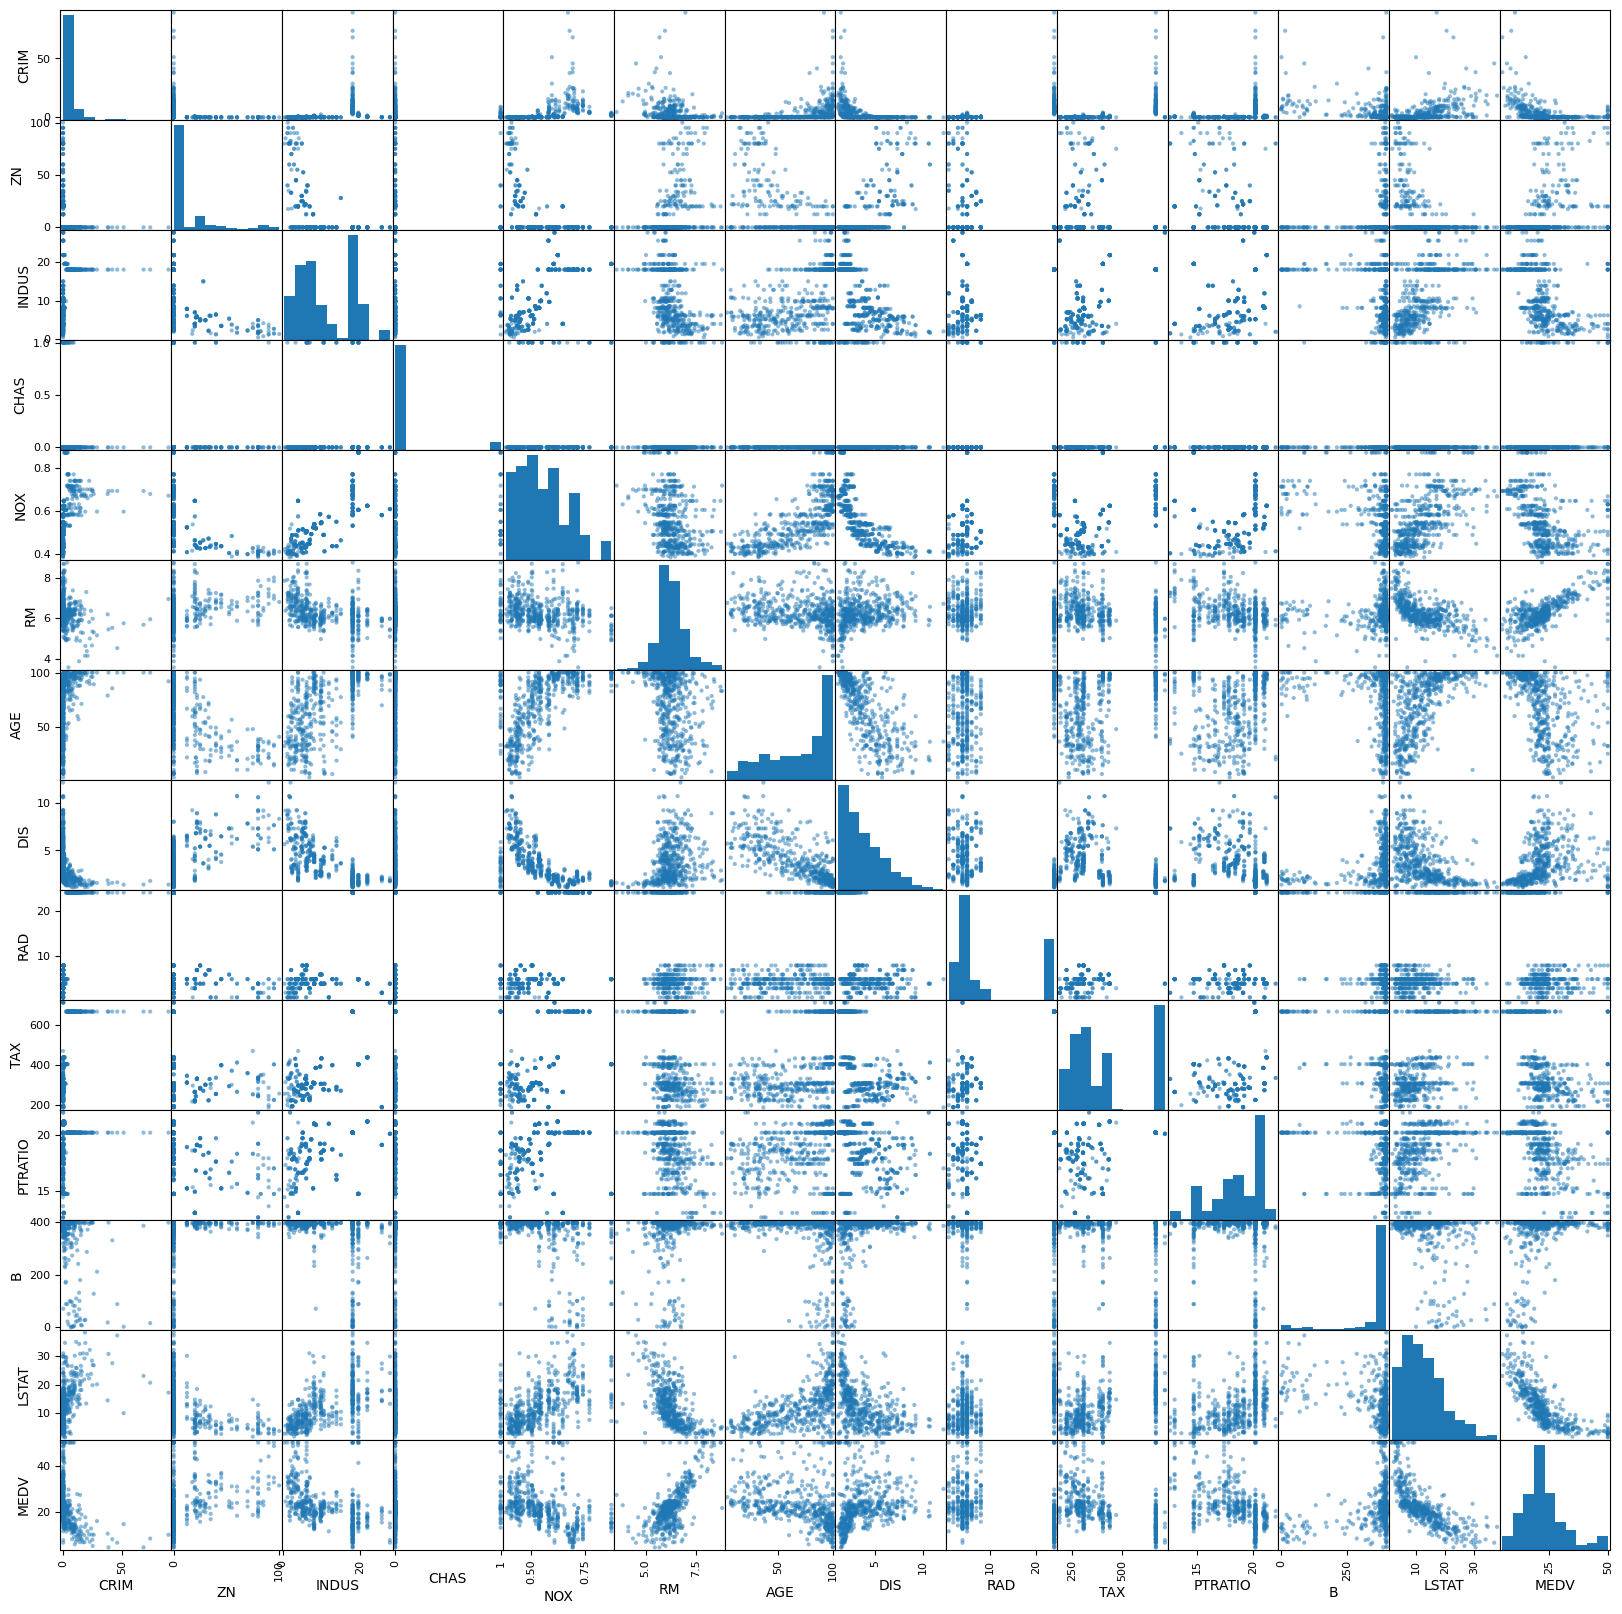

In [26]:
scatter_matrix(df_boston, figsize=(20,20))
plt.show()

<Axes: >

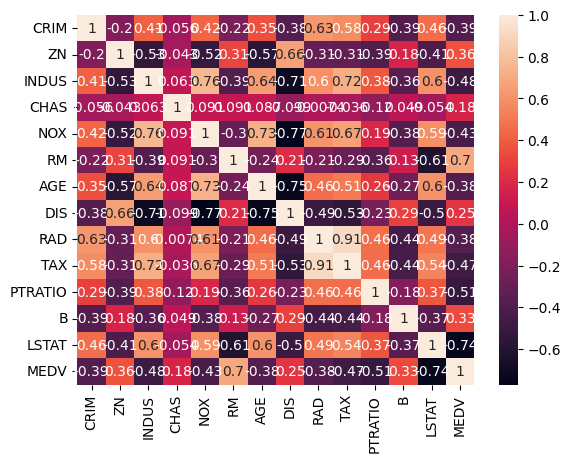

In [27]:
sns.heatmap(df_boston.corr(), annot=True)

In [28]:
df_boston['LSTAT_RM'] = df_boston['LSTAT'] * df_boston['RM']
df_boston['DENSITY_INDEX'] = df_boston['INDUS'] / (df_boston['ZN'] + 1)
df_boston['DESIRABILITY'] = (df_boston['RM'] / df_boston['LSTAT']) + df_boston['B'] - df_boston['NOX'] * 100
df_boston['PTRATIO_DIS'] = df_boston['PTRATIO'] * df_boston['DIS']
df_boston['ROOM_QUALITY'] = df_boston['RM'] * df_boston['PTRATIO']
df_boston['RAD_PTRATIO'] = df_boston['RAD'] * df_boston['PTRATIO']
df_boston['RM_SQ'] = df_boston['RM'] ** 2


<Axes: >

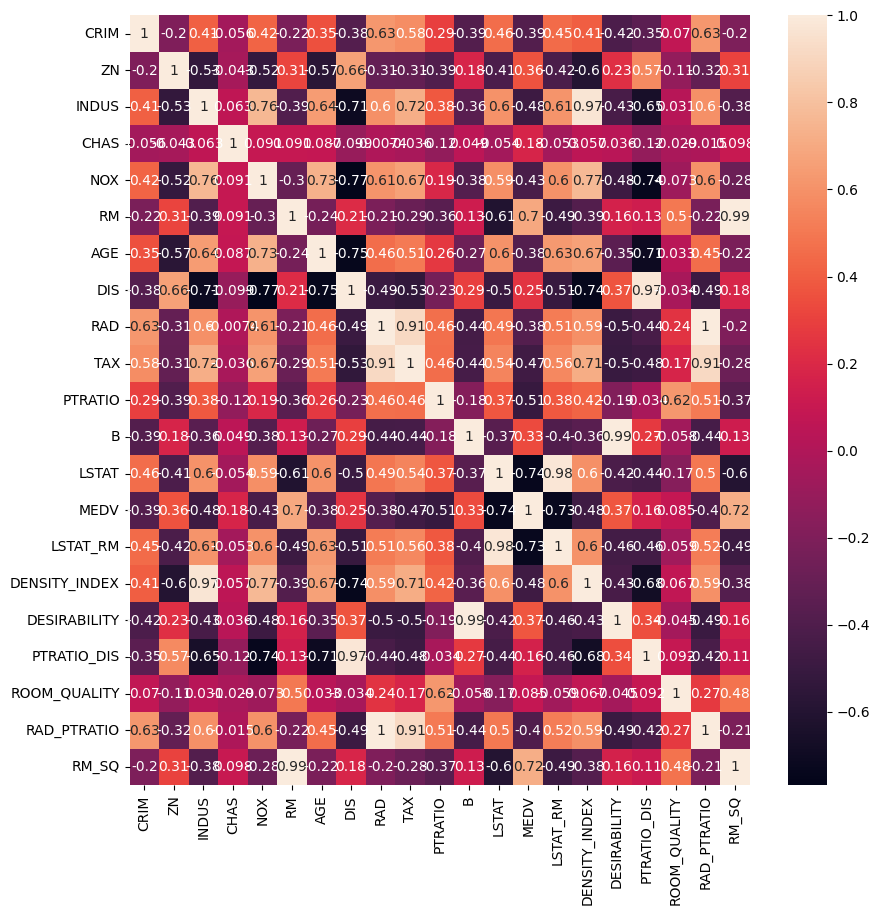

In [29]:
fig,ax = plt.subplots()
fig.set_size_inches((10,10)),
sns.heatmap(df_boston.corr(), annot=True, ax=ax)

In [30]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'LSTAT_RM', 'DENSITY_INDEX',
       'DESIRABILITY', 'PTRATIO_DIS', 'ROOM_QUALITY', 'RAD_PTRATIO', 'RM_SQ'],
      dtype='object')

In [31]:
df_boston = df_boston.drop(columns=['CHAS','RM','AGE','RAD'])

In [32]:
X = df_boston.drop(['MEDV'], axis=1)
y = df_boston['MEDV']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=59)

In [34]:
mdl = LinearRegression()
mdl.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred = mdl.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2*100:.2f}")
print(f"RMSE: {rmse:.2f}")

R² score: 94.08
RMSE: 2.76


In [36]:
len(df_boston['MEDV'])

506

<Axes: >

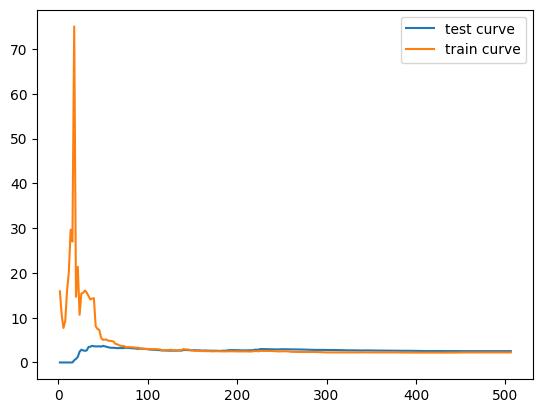

In [37]:
sizes = np.linspace(start=2, stop=len(df_boston['MEDV']), num=253)
errors_test_tv = []
errors_train_tv = []

for size in sizes:
    mdl_learning_sales = LinearRegression()
    mdl_learning_sales.fit(X_train[:int(size)], y_train[:int(size)])
    
    y_calculated_full_test = mdl_learning_sales.predict(X_test)
    y_calculated_some_tst = mdl_learning_sales.predict(X_train[:int(size)])

    errors_test_tv.append(mean_absolute_error(y_calculated_some_tst, y_train[:int(size)]))
    errors_train_tv.append(mean_absolute_error(y_calculated_full_test, y_test))


sns.lineplot(x=sizes, y=np.array(errors_test_tv), label='test curve')
sns.lineplot(x=sizes, y=np.array(errors_train_tv), label='train curve')